> **REMINDER: DO NOT EDIT IF INSIDE CLONED GIT FOLDER**<br>
> \> Go ahead and copy it and paste it in another folder. Work inside the pasted file.

# Week 2: A Data Scientist's most fundamental tools

Today's exercises will be related to chapters 3, 4, 5 from DSFS. The point of these exercises is to refresh your memory on some mathematics and get you comfortable doing computations in code.

The exercises today cover:
* Basic visualization
* Linear algebra
* Statistics

**Advice**: Some of you may be new to solving problems using code. You may be wondering *what level of detail* I expect in your solutions, your code comments and explanations. **This is the guideline:** Solve the exercises in a manner that allows you to—later in life—use them as examples. This also means that you should add code comments when the code isn't self-explanatory or if you're afraid it won't make sense when you look at it with fresh eyes. You may also want to comment on your output in plain text to capture the conclusions you arrive at throughout your analysis. But express yourself succinctly. To quote (probably) Einstein: *"Make everything as simple as possible, but not simpler"*. Finally, when you optimize for your own future comprehension, other people will be able to understand what you did.

[**Feedback**](http://ulfaslak.com/vent)

## Exercises

### Part 1: Visualization (DSFS Chapter 3)

>**Ex. 2.1.1**: The figure below meets the minumum style requirements which I expect the figures you make in this class (and life in general) should also meet:
* Figure sizing. Try to make the aspect ratio close to 4:3.
* Axis labels. Note that you may want to alter the `fontsize` to make them look nice.
* Properly sized x and y tick labels.
* Title (optional: not always necessary, but oftens helps the reader)
* Legend (general rule: only use if you have multiple trends so reader can distinguish).
>
> Your task in this exercise if to reproduce this figure (perfect match not required).
>
>*Hint: To get figures to display inside the notebook, use the Jupyter magic `%matplotlib inline`. For pointers on how to make plots like this in Python, Google something like "scatter plot python" and see if you can find some examples of how other people do this.*

![img](https://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.1.1.png)

>**Ex. 2.1.2**: The `get_x_y` function below gives you the number of comments versus score for the latest `N` posts on a given `subreddit`.
1. Make a scatter plot of `x` vs. `y` for the "blackmirror" subreddit (**remember** what you learned in the previous exercise about **styling**). Comment on what you see.
2. Maybe you've noticed that it looks pretty bad right? That's because the data does *not scale linearly*! This is a very common thing. To visualize it you should then try to *transform* it somehow. In this case, the data scales *exponentially* in both the x and y direction. Which transformation should we use to make it linear?
3. In two seperate figures, floating side by side, scatter plot (left) the set of x and y variables for "blackmirror" and (right) x and y for "news". Remember to transform the data. My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2b.png).
4. Comment on any differences you see in the trends. Why might number of comments versus post upvotes look different for a TV-show than for world news?
>
>*Hint: By "transformation" I explicitly mean that you map some function onto every value in a list of values. Example: I can apply a square root transformation like `x = [np.sqrt(v) for v in x]`. A faster way to do that, of course, would be just `x = np.sqrt(x)`.*

In [1]:
import requests as rq

def get_x_y(subreddit, N, count=25):
    
    def _get_data(subreddit, count, after):
        url = "https://www.reddit.com/r/%s/.json?count=%d&after=%s" % (subreddit, count, after)
        data = rq.get(url, headers = {'User-agent': 'sneakybot'}).json()
        print("Retrieved %d posts from page %s" % (count, after))
        return data
    
    after = ""

    x, y = [], []
    for n in range(N//count):
        data = _get_data(subreddit, count, after)
        for d in data['data']['children']:
            x.append(d['data']['num_comments'])
            y.append(d['data']['score'])
        after = data['data']['after']

    return x, y
                          
x, y = get_x_y("blackmirror", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_etx98w
Retrieved 25 posts from page t3_es48od
Retrieved 25 posts from page t3_eqkay7
Retrieved 25 posts from page t3_epkmnw
Retrieved 25 posts from page t3_enmura
Retrieved 25 posts from page t3_emhqzf
Retrieved 25 posts from page t3_ela2bc
Retrieved 25 posts from page t3_eismcs
Retrieved 25 posts from page t3_eh0l68
Retrieved 25 posts from page t3_egh0rq
Retrieved 25 posts from page t3_ef8qsi
Retrieved 25 posts from page t3_ee4kg6
Retrieved 25 posts from page t3_ecyhrx
Retrieved 25 posts from page t3_ebi6ic
Retrieved 25 posts from page t3_e9h8yp
Retrieved 25 posts from page t3_e7lx0h
Retrieved 25 posts from page t3_e5z8p3
Retrieved 25 posts from page t3_e45dpc
Retrieved 25 posts from page t3_e2ijih


**ANS 1:** Make a scatter plot of x vs. y for the "blackmirror" subreddit. Comment on what you see.

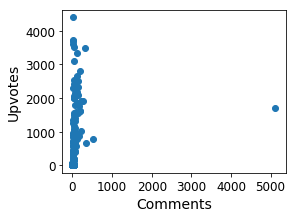

In [2]:
%matplotlib inline
import matplotlib.pylab as plt

# First I instantiate a figure
plt.figure(figsize=(4, 3))

# Then I create the scatter plot. This line alone would also have produced
# a scatter plot, but it would look terrible and have no styling.
plt.scatter(x, y)

# Name and style the x and y labels
plt.xlabel("Comments", fontsize=14)
plt.ylabel("Upvotes", fontsize=14)

# Size the x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the figure (also closes it)
plt.savefig("../plots/ex2.1.2.1.pdf", bbox_inches='tight')

**Comment**: This does not look nice. It looks like there are a couple of outliers that makes the rest of the points
indistinguishable, or maybe the data is distributed exponentially and needs to be log-transformed.

**ANS 2:** Which transformation should we use to make it linear?

It looks like the data is exponentially
distributed along both axes. The inverse of an exponential is the logarithm, so we can apply a log-transform to
make the data linear. Importantly, there are two ways to do this. We can either (1) log-scale the data or (2)
logscale the axes we plot the data along. Both will have the same visual appearance.

**ANS 3:** In two seperate figures, floating side by side, scatter plot (left) the set of
x and y variables for "blackmirror" and (right) x and y for "news". Remember to transform the data.

In [3]:
# Collect the news data. I do this in a seperate cell, because it takes some time.
x_news, y_news = get_x_y("news", 500, count=25)

Retrieved 25 posts from page 
Retrieved 25 posts from page t3_eusq6h
Retrieved 25 posts from page t3_euyzbj
Retrieved 25 posts from page t3_euxlfn
Retrieved 25 posts from page t3_euwnd7
Retrieved 25 posts from page t3_euqlp0
Retrieved 25 posts from page t3_eu6rj2
Retrieved 25 posts from page t3_eu8j3b
Retrieved 25 posts from page t3_eu2qzp
Retrieved 25 posts from page t3_etfkbg
Retrieved 25 posts from page None
Retrieved 25 posts from page t3_eusq6h
Retrieved 25 posts from page t3_euyzbj
Retrieved 25 posts from page t3_euxlfn
Retrieved 25 posts from page t3_euwnd7
Retrieved 25 posts from page t3_euqlp0
Retrieved 25 posts from page t3_eu6rj2
Retrieved 25 posts from page t3_eu8j3b
Retrieved 25 posts from page t3_eu2qzp
Retrieved 25 posts from page t3_etfkbg


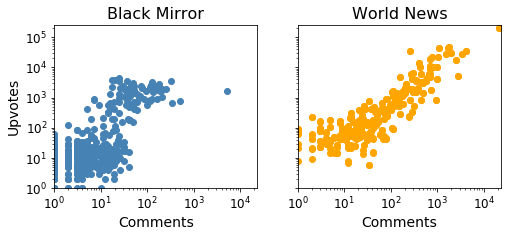

In [4]:
# Import matplotlib so we can globally set ticksizes
import matplotlib as mpl

# Set tick-sizes
mpl.rc('xtick', labelsize=12) 
mpl.rc('ytick', labelsize=12) 

# Instantiate the figure as `plt.subplots`. Specify that there should be
# one row and two columns, and that subplots should share x and y-axes.
fig, ax = plt.subplots(1, 2, figsize=(8, 3), sharex=True, sharey=True)

# Set subplot titles
ax[0].set_title("Black Mirror", fontsize=16)
ax[1].set_title("World News", fontsize=16)

# Set axis labels. Don't include y-axis label on the right plot because
# y-axes are shared
ax[0].set_xlabel("Comments", fontsize=14)
ax[1].set_xlabel("Comments", fontsize=14)
ax[0].set_ylabel("Upvotes", fontsize=14)

# Make scatter plots
ax[0].scatter(x, y, c="steelblue")
ax[1].scatter(x_news, y_news, c="orange")

# Log scale axes. Only necessary to do it on one of the plots because axes
# are shared
ax[0].set_xscale("log")
ax[0].set_yscale("log")

# Set x and y limits. Also only necessary on one plot because of axis sharing
ax[0].set_xlim(1)
ax[0].set_ylim(1)

# Render and close
plt.savefig("../plots/ex2.1.2.3.pdf", bbox_inches='tight')

**ANS 4:** Comment on any differences you see in the trends. Why might number of comments versus post upvotes
look different for a TV-show than for world news?

The world news curve is a nice powerlaw (linear in log-log space), which makes sense given that there is probably
a sliding scale of interest that people can have in a topic. For the TV-show it is not the same at all (at least
not at the time of writing). There, it seems there are two classes of posts, one that gets relatively little 
attention, and another that reaches a very large number of up-votes and potentially more comments. Could be
something similar to "viral" posts.


>**Ex. 2.1.3**: There is clearly a huge level unevenness in the distribution of how likes and comments given to different posts. Let's visualize this using histograms!
1. Log transform `y` (e.g. create a new variable called `y_transformed`) and input it to `plt.hist`. Notice that of there are zeros in `y`, `np.log` will convert them to `-inf`, which `plt.hist` can't handle. You should therefore remove zeros before log transforming. When you have done this, execute `hist_output = plt.hist(x_transformed)`. This should produce a histogram. But what does the variable `hist_output` contain?
2. Use `hist_output` to make a similar histogram with the `plt.bar` plotting function. I make you do this to force
into your permanent memory what a histogram is: a bar chart showing counts within intervals/bins.
3. Plot the distributions of `y_transformed` for "blackmirror" and "news" as histograms, side by side (you can just use the regular `plt.hist` function here). My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2c.png). Comment on the result.

**ANS 1:** Log transform y (e.g. create a new variable called y_transformed) and input it to `plt.hist` (...)
But what does the variable `hist_output` contain?

(array([ 35.,  80., 119.,  91.,  47.,  17.,  10.,  19.,  47.,  10.]), array([0.        , 0.89994959, 1.79989918, 2.69984876, 3.59979835,
       4.49974794, 5.39969753, 6.29964711, 7.1995967 , 8.09954629,
       8.99949588]), <a list of 10 Patch objects>)


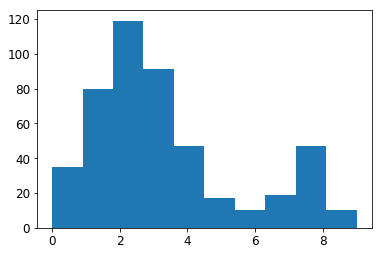

In [298]:
# Remove zeros from y and log-transform the result
y_transformed = np.log([v for v in y if v > 0])

# Run the histogram and collect the output into `hist_output`
hist_output = plt.hist(y_transformed)

# Print `hist_output`
print(hist_output)

**Comment**: `plt.hist` returns a tuple with three elements. The first element is the bin counts, the second is the position
of bin edges and the third are the matplotlib Patch objects for rendering the bars.

**ANS 2:** Use `hist_output` to make a similar histogram with the `plt.bar` plotting function.

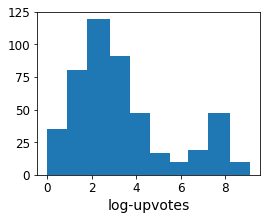

In [299]:
plt.figure(figsize=(4, 3))

# Extract x and y coordinates for bar plot
left_edges = hist_output[1][:-1]
bar_heights = hist_output[0]

# Plot bar chart. 
plt.bar(left_edges, bar_heights, width=1, align="edge")
plt.xlabel("log-upvotes", fontsize=14)

plt.savefig("../plots/ex2.1.3.2.pdf", bbox_inches='tight')


**ANS 3:** Plot the distributions of y_transformed for "blackmirror" and "news" as histograms, side by side

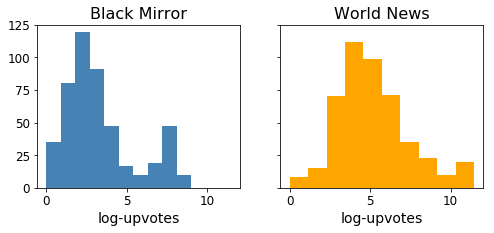

In [300]:
# No need to set global tick sizes again

# Get y_transformed for news
y_news_transformed = np.log([v for v in y_news if v > 0])

# Instantiate the figure as `plt.subplots`. Specify that there should be
# one row and two columns, and that subplots should share x and y-axes.
fig, ax = plt.subplots(1, 2, figsize=(8, 3), sharex=True, sharey=True)

# Set subplot titles
ax[0].set_title("Black Mirror", fontsize=16)
ax[1].set_title("World News", fontsize=16)

# Set axis labels. Don't include y-axis label on the right plot because
# y-axes are shared
ax[0].set_xlabel("log-upvotes", fontsize=14)
ax[1].set_xlabel("log-upvotes", fontsize=14)

# Make scatter plots
ax[0].hist(y_transformed, color="steelblue")
ax[1].hist(y_news_transformed, color="orange")

# Render and close
plt.savefig("../plots/ex2.1.3.3.pdf", bbox_inches='tight')

**Comment**: Almost posts get more upvotes in the worldnews subreddit, probably because there are more users there.
But in world news we don't have a bimodal distribution. Importantly: running this at different times will give
different result.

### Part 2: Linear algebra (DSFS Chapter 4)

>**Ex. 2.2.1**: What does Joel (book) mean when he uses the word *vector*? What are [Grant](https://youtu.be/fNk_zzaMoSs)s vector definitions from the perspectives of the Physicist, the Computer Scientist and the Mathematician, respectivelt?

**ANS:****

Joel** defines vectors *points* in a space. **Grants phycisist** sees a vector as a direction with a length, his
**Computer Scientist** sees it as a list of numbers and the **Mathematician** generalizes these views to say that a
vector is "anything where theres a sensible notion of" addition and multiplication.

>**Ex. 2.2.2**: Using `numpy`, compute:
1. `2 * [2, 3]`,
2. `[3, 8] + [6, 1]`,
3. `[3, 8] * [6, 1]` and
4. `[3, 8] · [6, 1]` (dot product)
5. `[3, 8, 0] x [6, 1, 0]` (cross product)

In [73]:
# `np` is the common alias for `numpy`.
import numpy as np

# ANS 1: 2 * [2, 3]
print("1.", 2 * np.array([2, 3]))

# ANS 2: [3, 8] + [6, 1]
print("2.", np.array([3, 8]) + np.array([6, 1]))

# ANS 3: [3, 8] * [6, 1]
print("3.", np.array([3, 8]) * np.array([6, 1]))

# ANS 4: [3, 8] · [6, 1]
print("4.", np.dot(np.array([3, 8]), np.array([6, 1])))

# ANS 5: [3, 8, 0] x [6, 1, 0]
print("5.", np.cross(np.array([3, 8, 0]), np.array([6, 1, 0])))

1. [4 6]
2. [9 9]
3. [18  8]
4. 26
5. [  0   0 -45]


>**Ex. 2.2.3**: Say you have two vectors. What does it mean that the dot product between them is zero or very close to zero? What if it's very large? Intuitively, what does the dot product then measure?

**ANS:**

The dot product of two vectors is proportional to the size of the projection of one onto the other. So if the
dot product is zero this projection must have size zero, and the only way that's possible is if they are orthogonal.
If the dot product is large relative to the length of the vectors, it means that they are parallel or close to 
parallel. So intuitively, it measures how "aligned" they are. Or how similar the values in them are.

>**Ex. 2.2.4**: In Data Science, we often think of matrices as (usually two-dimensional) containers for data. If we have $N=500$ data points each with $M$ features to them, we can represent this data using an $N \times M$ matrix, that is a matrix that has $N$ rows, one for each datapoint, and $M$ columns, one for each feature. Below I fetch a dataset of wines (rows) and their features (columns).

In [301]:
import pandas as pd

# Download dataset
X = pd.read_csv("https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv").drop('Wine', axis=1)

# Display dataset
X.head(10)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


>So this dataset has $N=178$ rows and $M=13$ columns. Let's start by finding the so-called *covariance matrix* of the features. It is a square, in this case, $13\times13$ matrix where every value $i,j$ scores the covariance between features $i$ and $j$. [Read more here](https://en.wikipedia.org/wiki/Covariance_matrix).
1. Use the `np.cov` method on `X` to get its $13 \times 13$ covariance matrix.
2. Do you notice any characteristics of how values are organized in this matrix? Comment.
3. Plot the distribution of covariances, e.g. using a histogram.
4. Plot the distribution of correlations in the same way. Comment on the differences between these two plots. Is one easier to interpret than the other?
>
>*Hint 1: `np.cov` expects that rows are features and columns are observations. That is the transpose of how `X` 
is represented now.*<br>
>*Hint 3: DO NOT just do something like `plt.hist(my_cov_matrix)`. Not only will it reflect that you don't understand
what the covariance matrix is, it will also break your kernel.* <br>
>*Hint 4: The correlation matrix can be obtained with the `np.corrcoef` function.*

**ANS 1:** Use the np.cov method on X to get its 10×10 covariance matrix.

In [302]:
# Get the covariance matrix. Importantly, transpose `X`
cov_mat = np.cov(X.T)

**ANS 2:** Do you notice any characteristics of how values are organized in this matrix? Comment.

(1) The matrix is symmetric across the diagonal, and (2) the diagonal values correspond to the
variances of each feature. (3) They are both positive and negative.

**ANS 3:** Plot the distribution of covariances, e.g. using a histogram.

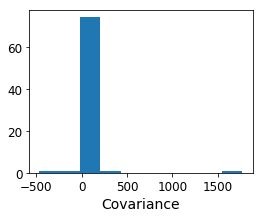

In [304]:
# Get number of rows in covariance matrix
N = cov_mat.shape[0]

# Extract the upper triangle of values of `cov_mat` into a new array
covariances = cov_mat[np.triu_indices(N, 1)]

# Plot the histogram of covariances
plt.figure(figsize=(4, 3))
plt.hist(covariances)
plt.xlabel("Covariance", fontsize=14)
plt.savefig("../plots/ex2.2.3.3.pdf", bbox_inches='tight')

**ANS 4:** Plot the distribution of covariances, e.g. using a histogram.

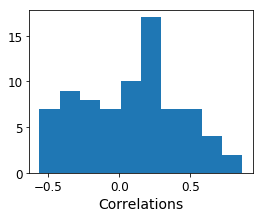

In [305]:
# Get correlation matrix
corr_mat = np.corrcoef(X.T)

# Plot the histogram of correlations
plt.figure(figsize=(4, 3))
plt.hist(corr_mat[np.triu_indices(corr_mat.shape[0], 1)])
plt.xlabel("Correlations", fontsize=14)
plt.savefig("../plots/ex2.2.3.4.pdf", bbox_inches='tight')

**Comment:** The covariances can be very large values, because they scale with the variance of the features.
The correlations are normalized with respect to these, and therefore assume values between -1 and 1. This makes
them much easier to interpret. We see that most of the wine features correlate positive negatively or positively
and that there is a correlation peak at around 0.2.

>**Ex. 2.2.5**: There's another use of the covariance matrix, other than just learning how features co-vary. In fact, it turns out that the *eigenvectors* of the covariance matrix are a set of mutually orthogonal vectors, that point in the directions of greatest variance in the data. The eigenvector with the greatest *eigenvalue* points along the direction of greatest variation, and so on. This is pretty neat, because if we know along which axes the data is most stretched, we can figure out how best to project it when visualizing it in 2D as a scatter plot! This whole procedure has a name: **Principal Component Analysis** (PCA) and it was invented by Karl Pearson in 1901. It belongs to a powerful class of linear algebra methods called **Matrix Factorization** methods. Ok, so rather than spending too much time on the math of PCA, let's just use the `sklearn` implementation and fit a PCA on `X`.

In [306]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

>1. Explain what the matrix you get when you call `pca.components_` means.
2. Make a bar plot of `pca.explained_variance_ratio_` and explain what it means (you may want to log-scale the y-axis). What insights about our data can we extract from this?
3. Indeed, problem with the data AS-IS, is that the different features have very different variances (some are huge numbers others are small). The way to fix this is by doing something called "[zscoring](https://en.wikipedia.org/wiki/Standard_score)", whereby each feature is rescaled to have zero mean and unit standard deviation. In this way, all of the data ends up with comparable variance. Make a new array `X_z` that is the zscored `X`, using the `scipy.stats.zscore` function. Show that each column has zero mean and unit standard deviation.
4. Transform `X` using the PCA we fitted above to create a new array `X_pca`. Then fit a new PCA to `X_z` and transform it to create another new array `X_z_pca`. Finally, scatter plot against each other the first two components (i.e. fitst two columns in array) of `X_pca`. Do the same for `X_z_pc`. Comment on the difference.

**ANS 1:** Explain what the matrix you get when you call pca.components_ means.

To figure this out, lets print its shape

In [307]:
pca.components_.shape

(10, 13)

Read about the `components_` attribute (run `?pca` and look under "Attributes").

We see that it has 10 rows (corresponding to the 10 components returned from the PCA transform) and 13 columns
(corresponding to the original 13 dimensions). Specifically, each row in `pca.components_` is an eigenvector of
the covariance matrix, or a direction in the data space with high variance.

**ANS 2:** Make a bar plot of pca.explained_variance_ratio_

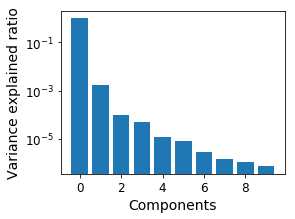

In [308]:
plt.figure(figsize=(4, 3))
plt.bar(range(10), pca.explained_variance_ratio_)
plt.xlabel("Components", fontsize=14)
plt.ylabel("Variance explained ratio", fontsize=14)
plt.yscale("log")
plt.savefig("../plots/ex2.2.5.2.pdf", bbox_inches='tight')

**... and explain what it means.**:

The `pca.explained_variance_ratio_` vector tells us what fraction of the total variance in our data
is explained by each principal component. 

**What insights about our data can we extract from this?**

In [309]:
pca.explained_variance_ratio_[0]

0.9980912304918974

In this case we observe that almost all of the variance in the data (99.8 %) is explained by the first principal
component. This corresponds to the data more or less falling on a single straight line throughout space. The reason
for this is that some of the features have tiny variance compared to other features that have huge variance.


**ANS 3:** Make a new array X_z that is the zscore X, using the scipy.stats.zscore function. Show that each column has zero mean and unit standard deviation.

In [310]:
from scipy.stats import zscore

# Do the z-scoring
X_z = zscore(X)

# Show that columns have zero mean (values will be very close to 0)
print(X_z.mean(0))

# Show that columns have unit standard deviation
print(X_z.std(0))

[-8.38280756e-16 -1.19754394e-16 -8.37033314e-16 -3.99181312e-17
 -3.99181312e-17  0.00000000e+00 -3.99181312e-16  3.59263181e-16
 -1.19754394e-16  3.49283648e-17  1.99590656e-16  3.19345050e-16
 -1.59672525e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**ANS 4:** Transform X using the PCA you just fitted, and scatter plot the first two dimensions of the transformed data. Please comment on what you see.

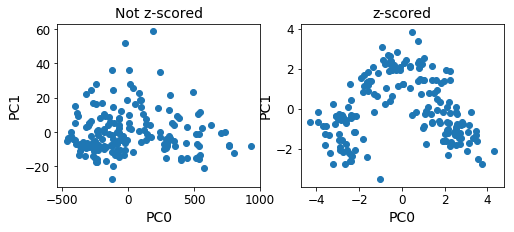

In [311]:
X_pca = pca.fit_transform(X)
X_z_pca = pca.fit_transform(X_z)

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.title("Not z-scored", fontsize=14)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC0", fontsize=14)
plt.ylabel("PC1", fontsize=14)

plt.subplot(1, 2, 2)
plt.title("z-scored", fontsize=14)
plt.scatter(X_z_pca[:, 0], X_z_pca[:, 1])
plt.xlabel("PC0", fontsize=14)
plt.ylabel("PC1", fontsize=14)

plt.savefig("../plots/ex2.2.5.4.pdf", bbox_inches='tight')

**Comment**: In the not z-scored data we see that the 0th component has huge variance, which explains the
`pca.variance_explained_ratio_` valued. It looks OK when the axes are scaled, but it really is non-sensible because
of the huge difference in variance. After z-scoring though, we see some interesting structure when plotting data
along the first two PCs. Looks a bit like an inverted U-shape. Clearly there are clusters.

### Part 3: Statistics (DSFS Chapter 5)

>**Ex. 2.3.1**: Take a vector `a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]`:
1. Compute the mean of `a` using `numpy`.
2. How is median defined? Compute the median of `a` using `numpy`.
3. For `a`, why might it make sense to take the median more seriously than the mean?

**ANS 1:** Compute the mean of a using numpy

In [312]:
import numpy as np

a = [1, 3, 2, 5, 3, 1, 5, 1, 9000]

print(np.mean(a))

1002.3333333333334


**ANS 2:** How is median defined? Compute the median of a using numpy

To compute the median, order the values and take the middle value. If there is an even number of values, the median
is the average of the two middle values.

In [313]:
print(np.median(a))

3.0


**ANS 2:** For a, why might it make sense to take the median more seriously than the mean?

Because there is a huge outlier. Therefore the mean will be skewed a lot, but the median will give a good sense of where most of the numbers are.

>**Ex. 2.3.2**: Using the same vector `a`:
1. How is *range* defined? Compute it.
2. How is *variance* defined? How do variance and standard deviation relate? Compute them both. Which value is greater?
3. What is the interquartile range? Compute it, and explain why it might be useful.

**ANS 1:** How is range defined? Compute it

The range is the max minus the min value. We can compute it like

In [314]:
print(max(a) - min(a))

8999


**ANS 2:** How is variance defined? How do variance and standard deviation relate? Compute them both. Which value is greater?

The variance is the average squared distance from the mean for each value. The formula to compute is:

$$\sigma^2 = \frac{1}{n}\sum^n_{i=0}(x_i-\mu)^2$$

It is the square of the standard deviation, which is then defined as the average absolute distance from the mean.
So the variance is always a greater number than standard deviation.

In [315]:
print("Variance:\t\t", np.var(a))
print("Standard deviation:\t", np.std(a))

Variance:		 7995336.222222224
Standard deviation:	 2827.6025573305424


**ANS 3:** What is the interquartile range? Compute it, and explain why it might be useful.

The interquartile range is the range of the middle 50% of the data. It can be useful to understand what the range
of the middle part of the data is, especially when there are outliers.

In [316]:
np.percentile(a, 75) - np.percentile(a, 25)

4.0

We see here, compared to the range, this is a much smaller number.

>**Ex. 2.3.3**: Covariance and correlation are both measures of trend similarity.
1. How do they relate?
2. Compute the correlation between `a` and `b = [0, 4, 1, 6, 2, 0, 6, 0, 2]`.
3. How does that result change if you remove the last data-point from each list? Why? What *term* do we use for that last value for both `a` and `b`?

**ANS 1:** How do they relate?

The correlation coefficient is the covariance normalized by the product of standard deviation of the two compared
variables. It goes:

$$r_{X,Y} = \frac{\mathrm{cov}(X,Y)}{\sigma_X\sigma_Y}$$

**ANS 2.3.3.2: Compute the correlation between a and b = [0, 4, 1, 6, 2, 0, 6, 0, 2]**

In [317]:
b = [0, 4, 1, 6, 2, 0, 6, 0, 2]

print(np.corrcoef(a, b)[0, 1])

-0.05051844317076045


**ANS 2.3.3.3: How does that result change if you remove the last data-point from each list? Why? What term do we use for that last point?**

In [318]:
print(np.corrcoef(a[:-1], b[:-1])[0, 1])

0.9766053372749897


**Comment:** Now we have a high positive correlation, because the last point was a outlier. So the Pearson
correlation is very sensitive to outliers!

>**Ex. 2.3.4.EXTRA**: People often use the p-value to gauge the *significance* of a given result. If the p-value of a result is low, the result is significant (which is good) and vice versa. Intuitively, the p-value measures the probabilty that a result *could have been obtained at random*, so you can imagine that if you find that the p-value for some result is HIGH (close to one), regardless of how cool it is, people will not care because, well, you just got lucky with that measurement, didn't you? I created two lists for you below, and you are going to find out if they are *significantly* correlated. You will be using the significance threshold 0.05 (which is arbitrary, disputed, yet very standard in the literature).
>
>***This exercise will not be included in the assignment. But, you can earn up to 10 extra credit points if you solve it and submit it to the teacher. Your solution must reflect that you have understood the idea numerical hypothesis testing.***

In [319]:
# You can incresae this to make the data more noisy (but let it be 4 for now)
noise_level = 4

# I'm just seeding the random number generator here, so we can compare results
np.random.seed(0)

# This is your data
x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
y = np.arange(0, 20) + np.random.normal(size=20) * noise_level

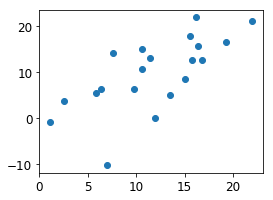

In [320]:
# Why not make a scatter plot here, to see what you're working with?
plt.figure(figsize=(4, 3))
plt.scatter(x, y)
plt.show()

>1. If you plotted `x` and `y` against each other, you probably noted that it looks like they correlate. Use the method `pearsonr` from `scipy.stats` to **compute the correlation coefficient**. Notice that the method also gives you the p-value of the correlation. For now, we ignore this.
>2. So how do we figure out if this correlation strength is significant? 
The devil's advocate would surely argue, that you could obtain a similar *or stronger* correlation between completely random data.
Well, screw you advocate, because we can SHOW that if you randomize THIS data, the correlation strength is almost always lower!
To put this in stat-lingo, the devil's advocate believes in the so-called *Null Hypothesis*–that your result is no different from random–and the way we REJECT this acvocate's pessimistic hypothesis, is simply by comparing OUR obtained correlation strength to one obtained from data we know is random, namely the *Null model*.
The Null model, in this case just a randomized version of our existing data. 
Your job, now, is to take `x` and `y`, randomize them (each independently) and compute the correlation coefficient.
>3. In 2. you probably found that the correlation coefficient of the Null model was lower than that of your real data.
But that was just one example of the Null hypothesis being wrong.
The devil's advocate is not convinced and wants more evidence.
Compute again the correlation coefficient of the Null model, but do it in a `for` loop 10000 times, and report the fraction of times that this correlation coefficient is greater or equal to the correlation coefficient of your real data.
Maybe it will happen in 0% of randomizaion trials, maybe 2%, but hopefully not more than 5%.
Yes, you guessed, it, this fraction is indeed the p-value.
So is it really significant?
>4. Complete the function below that takes as input `noise_level` and computes a p-value. Let `noise_level` vary between 1 and 50 and plot the p-value as a function of `noise_level` so we can see how our result becomes less and less significant as we increase the noise. Two questions: (1) around which value of `noise_level` does the correlation become insignificant, and (2) which p-value does the curve saturate at for large `noise_level`?

In [321]:
def compute_pval(noise_level, n=10000):

    # Seed random number generator
    np.random.seed(0)
    
    # Generate data
    x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    y = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    
    # Unseed the random number generator
    np.random.seed(None)
    
    # Compute the baseline correlation coefficient
    r_baseline = pearsonr(x, y)[0]
    
    # Code with for loop that computes the p-value by randomizing data and
    # comparing Pearson correlation to baseline. Should correspond to your
    # code from 2.3.4.3.

**ANS 2.3.4.1: If you plotted x and y against each other, you probably noted that it looks like they correlate. Use the method pearsonr from scipy.stats to compute the correlation coefficient. Notice that the method also gives you the p-value of the correlation. For now, we ignore this.**

In [322]:
from scipy.stats import pearsonr

print("Correlation:", pearsonr(x, y)[0])

Correlation: 0.6903628160082481


**ANS 2.3.4.2: Your job, now, is to take x and y, randomize them (each independently) and compute the correlation coefficient**

In [324]:
# Create function that shuffles. Importantly, it shuffles a copy of the input variable
# such as to not shuffle that also. We want to keep x and y intact.
def shuffle(v):
    v_shuf = [v_ for v_ in v]
    np.random.shuffle(v_shuf)
    return v_shuf

# Shuffle x and y
x_shuf = shuffle(x)
y_shuf = shuffle(y)

# Compute the correlation
print("Correlation:", pearsonr(x_shuf, y_shuf)[0])

Correlation: -0.26313106523135543


**ANS 2.3.4.3: Compute again the correlation coefficient of the Null model, but do it in a for loop 10000 times, and report the fraction of times that this correlation coefficient is greater or equal to the correlation coefficient of your real data.**

In [325]:
r_baseline = pearsonr(x, y)[0]

p_ = []
for _ in range(10000):
    if pearsonr(shuffle(x), shuffle(y))[0] >= r_baseline:
        p_.append(1)
    else:
        p_.append(0)
        
print(np.mean(p_))

0.0005


**Comment:** Yes, since it is below 0.05 we can say it is significant!

**ANS 2.3.4.3: Plot the p-value as a function of noise_level (let noise_level vary between 1 and 50), so we can see how our result becomes less and less significant as we increase the noise.**

In [327]:
def compute_pval(noise_level, n=10000):

    # Seed random number generator
    np.random.seed(0)

    # Generate data
    x = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    y = np.arange(0, 20) + np.random.normal(size=20) * noise_level
    
    # Unseed the random number generator
    np.random.seed(None)
    
    # Compute the baseline correlation coefficient
    r_baseline = pearsonr(x, y)[0]
    
    # Code with for loop that computes the p-value by randomizing data and
    # comparing Pearson correlation to baseline. Should correspond to your
    # code from 2.3.4.3.
    
    p_ = []
    for i in range(n):
        if pearsonr(shuffle(x), shuffle(y))[0] >= r_baseline:
            p_.append(1)
        else:
            p_.append(0)

    return np.mean(p_)

In [239]:
from tqdm import tqdm

pvals = []
for noise_level in tqdm(range(1, 51)):
    pvals.append(compute_pval(noise_level, 10000))

100%|██████████| 50/50 [00:49<00:00,  1.02it/s]


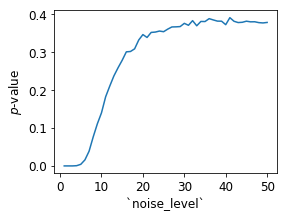

In [330]:
plt.figure(figsize=(4, 3))
plt.plot(range(1, 51), pvals)
plt.xlabel("`noise_level`", fontsize=12)
plt.ylabel("$p$-value", fontsize=12)
plt.savefig("../plots/ex2.3.4.3.pdf", bbox_inches='tight')

**(1) around which value of noise_level does the correlation become insignificant?**

Seems to happen around 6 or 7

**(2) which p-value does the curve saturate at for large noise_level?**

Close to 0.4. If we had generated random noise rather than seeding the random number generator, it would fluctuate around 0.5.